# Reading the Data


In [1]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers.csv")
df # data frame created using 'Mall_Customer.csv'

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Analysis & Data Visualization

In [2]:
df.shape

(200, 5)

There are **200 rows & 5 columns**. This means **200 data points** in the data and **5 features**. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


All the features are integer except the feature **'Gender'**. All the data are **non-null**. Which is good for us.

Now let's see what kind of trends are there in the Dataset. We will first start with looking at how many males and females are there in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


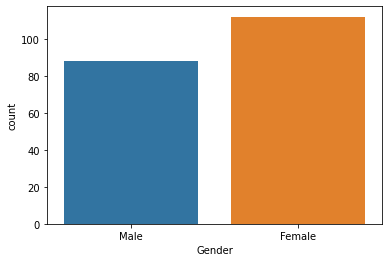

In [4]:
import seaborn as sns
sns.countplot('Gender',data=df)

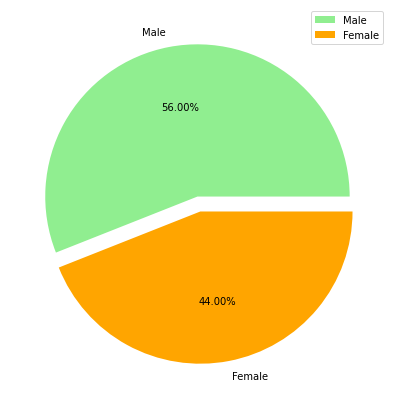

In [5]:
import matplotlib.pyplot as plt

labels=['Male','Female']
colors=['lightgreen','orange']
explode = [0, 0.1]
size = [112, 88]

plt.rcParams['figure.figsize']=(7,7)
plt.pie(size,colors=colors,explode=explode,labels=labels, autopct='%.2f%%')

plt.legend()
plt.show()

From here we can see the number of females is **more than** the number of males. (As Expected!!!). Now let's see how many people belong to different ages.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


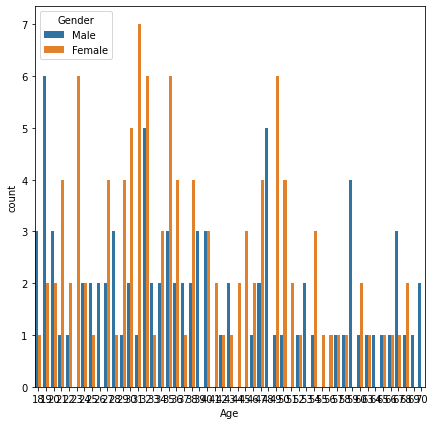

In [6]:
sns.countplot('Age',hue='Gender',data=df)

Again, the labels are not clear. So let's zoom in a bit.





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


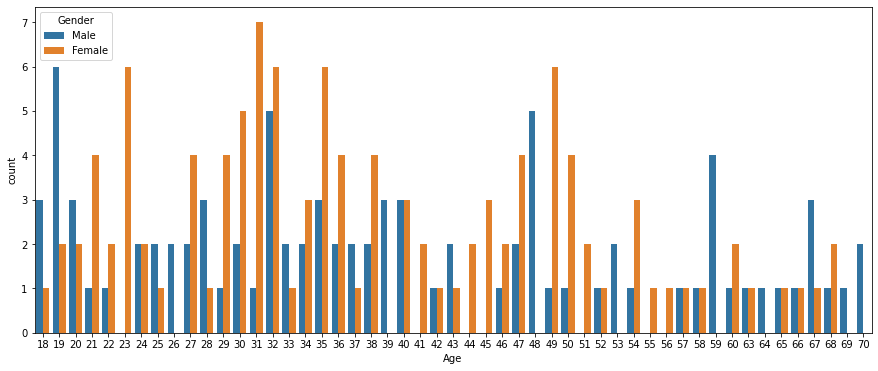

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.countplot('Age',hue='Gender',data=df)



*   There are two age ranges who comes the most to the mall. 1st age range is 27-38 and the second age range is 47-50. 


*   For the age group 18,19,20 the number of males is more than the number of females.



Let's have a similar observation for Annual Income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


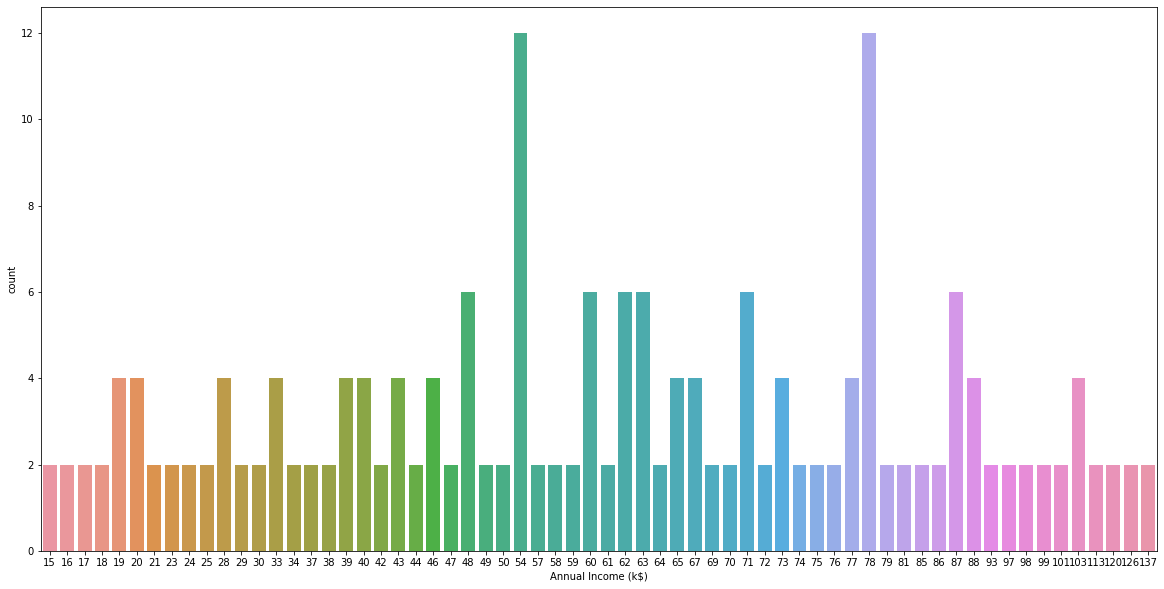

In [8]:
f,ax=plt.subplots(figsize=(20,10))
ax=sns.countplot('Annual Income (k$)',data=df)

So, people with salary of 54k\$ and 78k\$ appear to the mall for most of the time.


1.   And 19,20 k
2.   28 & 33 k$
3.   39,40,43,46,48,60,62,63,71,87



In [9]:

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

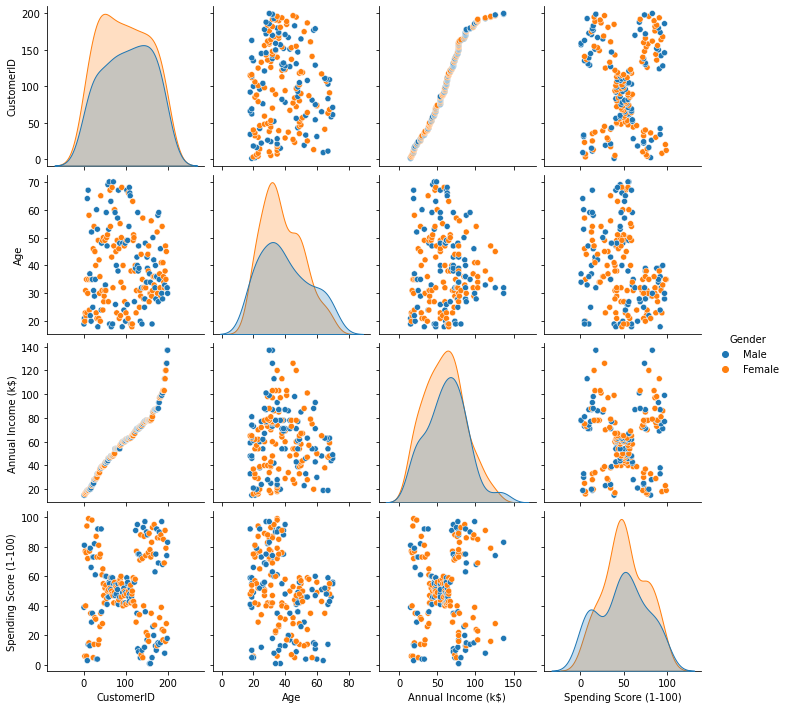

In [10]:
plt.figure(figsize=(15,15))
import seaborn as sns
sns.pairplot(df, hue='Gender')


*  Here we see that the feature 'Gender' is not much of a differentiating factor here. So we can easily get rid of it by **dropping** it.

  Because,from the above all the graphs,there is no disction for male and female alone 








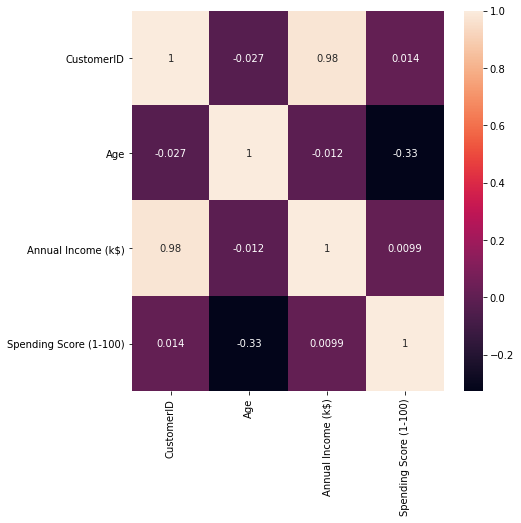

In [11]:
sns.heatmap(df.corr(),annot=True)

As,there is a high colinearity exists between **'customer id' and 'Annual income(k$)'**

I can drop **Customer Id** also.

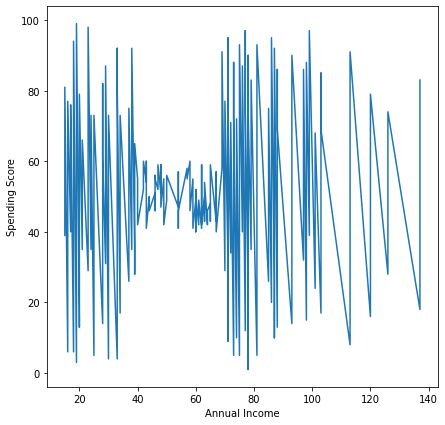

In [12]:
x=df['Annual Income (k$)']
y=df['Spending Score (1-100)']
plt.xlabel("Annual Income")
plt.ylabel('Spending Score')
plt.plot(x,y)

In [13]:

df=df.drop(['Gender','CustomerID'],axis=1)

In [45]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# Building the Model

# ***FOR 'ANNUAL INCOME' and 'SPENDING SCORE'***

In [14]:
from sklearn.cluster import KMeans
clusters=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
clusters


[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75363.74835182933,
 58300.44332159069,
 51116.986944634315,
 44344.94980177717,
 40831.99367156159,
 37798.68775917065]

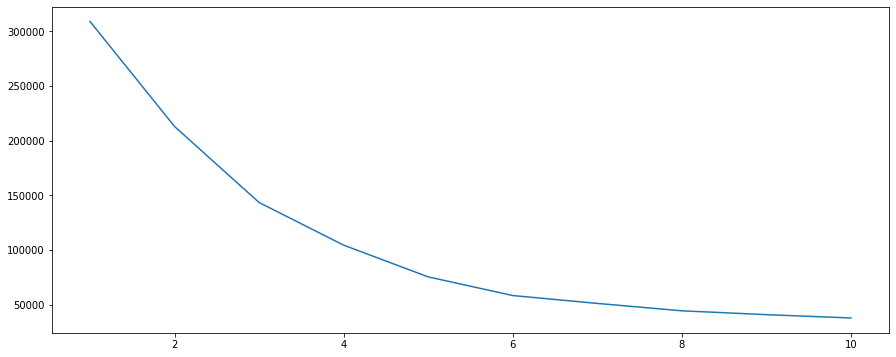

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

sns.lineplot(x=list(range(1, 11)), y=clusters)


Since we can see two elbows here at 3 and 5 so the best clusters should be one of them. So we will make 3 clusters and 5 clusters and check which one is giving good insight of the model.

Making 3 clusters

In [16]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


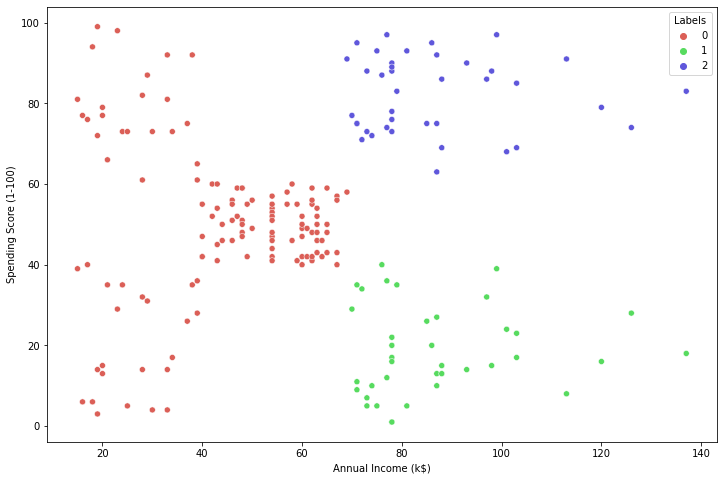

In [17]:
km3 = KMeans(n_clusters=3).fit(df)

df['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.show()


Making 5 clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


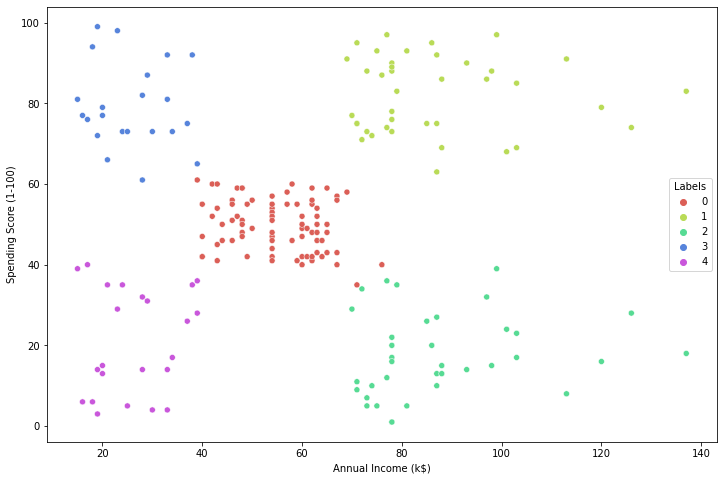

In [18]:
km5 = KMeans(n_clusters=5).fit(df)

df['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Labels'], palette=sns.color_palette('hls', 5))
plt.show()




1.   For cluster no=3, the green cluster is scattered from upper 
left to lower left(i.e. there is a huge variation of the cluster)
2.   from the m=3 graph,there is a trail in the green cluster at (40,40) and (40,60)

But there is no such trail and expansion of green cluster for m=5

**Conclusion**:So, m=5 is more efficent in making clustering than m=3



# ***Clusters of Customers Based on their Ages***

In [19]:
from sklearn.cluster import KMeans
clusters=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
clusters

[309199.975,
 213225.58567774936,
 143713.3711694809,
 104683.21461345673,
 75363.74835182933,
 58329.50733389417,
 51159.02938406623,
 44339.524123081996,
 41106.78004233004,
 37585.154603274495]

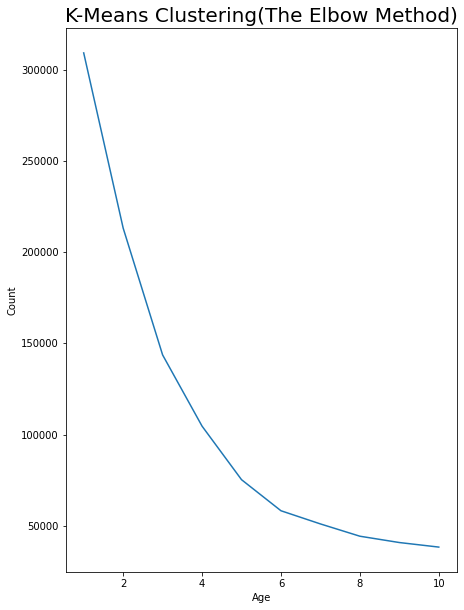

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7,10)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [21]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Labels'], dtype='object')

In [22]:
x=df.values  

In [26]:
x #converts the pandas data fram into a 2d array of the data points.

array([[ 19,  15,  39,   4],
       [ 21,  15,  81,   3],
       [ 20,  16,   6,   4],
       [ 23,  16,  77,   3],
       [ 31,  17,  40,   4],
       [ 22,  17,  76,   3],
       [ 35,  18,   6,   4],
       [ 23,  18,  94,   3],
       [ 64,  19,   3,   4],
       [ 30,  19,  72,   3],
       [ 67,  19,  14,   4],
       [ 35,  19,  99,   3],
       [ 58,  20,  15,   4],
       [ 24,  20,  77,   3],
       [ 37,  20,  13,   4],
       [ 22,  20,  79,   3],
       [ 35,  21,  35,   4],
       [ 20,  21,  66,   3],
       [ 52,  23,  29,   4],
       [ 35,  23,  98,   3],
       [ 35,  24,  35,   4],
       [ 25,  24,  73,   3],
       [ 46,  25,   5,   4],
       [ 31,  25,  73,   3],
       [ 54,  28,  14,   4],
       [ 29,  28,  82,   3],
       [ 45,  28,  32,   4],
       [ 35,  28,  61,   3],
       [ 40,  29,  31,   4],
       [ 23,  29,  87,   3],
       [ 60,  30,   4,   4],
       [ 21,  30,  73,   3],
       [ 53,  33,   4,   4],
       [ 18,  33,  92,   3],
       [ 49,  

***MAKING SIX CLUSTERS***

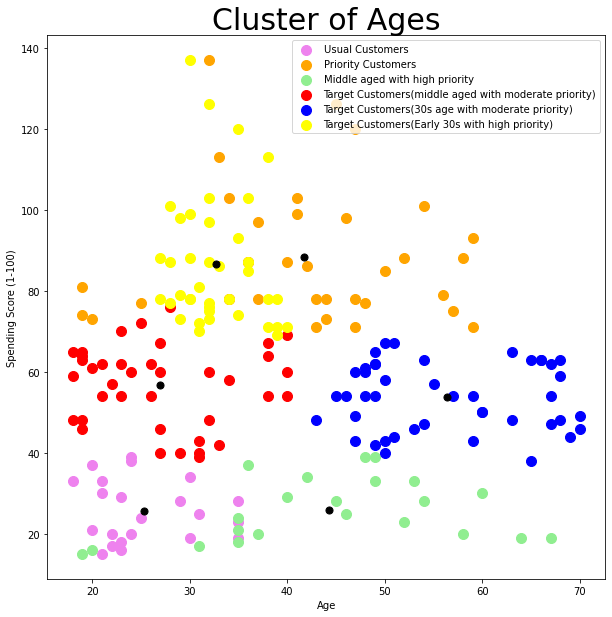

In [49]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#"n_cluster=6"=>number of clusters to be made,"init='k-means++'"=>selects initial cluster centre in a smart way to increase the speed of convergence
#"n_init=10"=>Initial centroids will be taken 10 times."max_iter=300"=>each run 300 iteration will be commenced.
# The best out of those 10 runs will be the final result.

ymeans = kmeans.fit_predict(x) # fit the x into k means



plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'violet', label = 'Usual Customers' )
#"x[ymeans == 0, 0], x[ymeans == 0, 1]" => All the data points that belongs to first cluster.For other scatter plots..so on
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Middle aged with high priority')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(middle aged with moderate priority)')
plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'blue', label = 'Target Customers(30s age with moderate priority)')
plt.scatter(x[ymeans == 5, 0], x[ymeans == 5, 1], s = 100, c = 'yellow', label = 'Target Customers(Early 30s with high priority)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***MAKING 3 CLUSTRES***

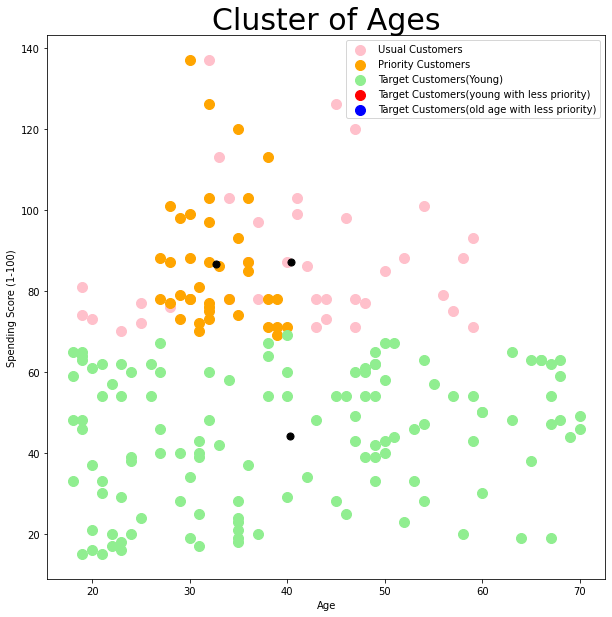

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(young with less priority)')
plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'blue', label = 'Target Customers(old age with less priority)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***MAKING 4 CLUSTERS***

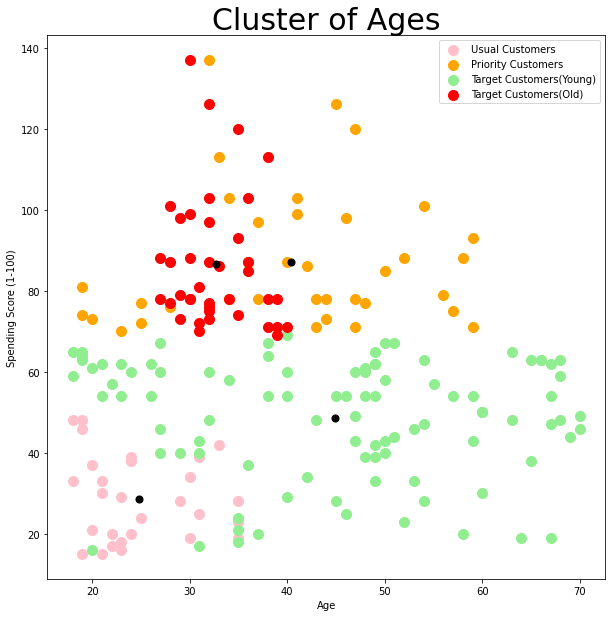

In [25]:
kmeans = KMeans(n_clusters = 4,  max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(df)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# ***CONCLUSION***

* From the section 'Spending Score ' vs "Annual income", **m=5 clusters** gives the optimal segments of customers

* From 'Age' vs 'Spending Score',**m=6 Clusters** gives best results out of other three with m=3 and m=4